In [ ]:
"""
Notebook: Clustering_Consumo_Zonal.ipynb
Date: Oct 2025

Description:
Application of the K-means Clustering algorithm to identify consumption and/or temperature patterns in mainland Portugal.

Main Objectives:
1. Grouping: Clustering of municipalities based on consumption variables (Average Consumption, HDD/CDD Sensitivity) or Temperature.
    2. Validation: Determination of the ideal number of clusters (Elbow Method or Silhouette Score).
3. Comparison: Analysis of the difference between clusters based on Temperature (Professor's reference) vs. clusters based on Consumption (main analysis of the thesis).
    
Data:
    final_zonal_diario.csv
    
Requirements:
    pip install pandas numpy matplotlib seaborn scikit-learn
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [1]:

FPATH = r"C:\Users\pcata\OneDrive\Ambiente de Trabalho\final_zonal_diario.csv"


df = pd.read_csv(FPATH, parse_dates=['date'], sep=';', dayfirst=True, low_memory=False)
print("Shape do dataframe:", df.shape)
display(df.head(3))

Shape do dataframe: (212274, 19)


,date,consumo_gwh,zone,tmean_c,tmax_c,tmin_c,hdd18,cdd22,amp_termica,precip_mm,rad_solar,sunshine_sec,humidade_relativa,nebulosidade_media,wind_speed_max,wind_gusts_max,day_length_hours,sunshine_h,day_length_h
0,2015-01-01,119.0,ALCOBAÇA,9.1,14.7,4.9,8.9,0.0,9.8,0.0,9.68,30286.11,79,0,11.9,19.8,9.43,8.412808,9.43
1,2015-01-01,119.0,ALMADA,9.5,14.0,6.3,8.5,0.0,7.7,0.0,10.00,30642.81,76,0,12.3,21.2,9.52,8.511892,9.52
2,2015-01-01,119.0,AMADORA,9.5,13.8,6.6,8.5,0.0,7.2,0.0,10.00,30613.52,74,0,12.3,21.2,9.50,8.503756,9.50


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

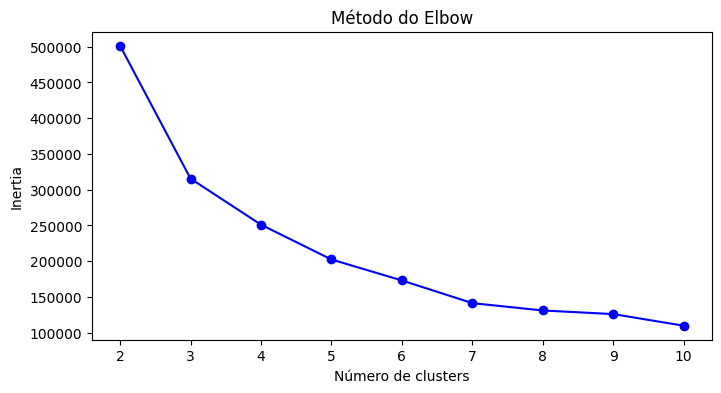

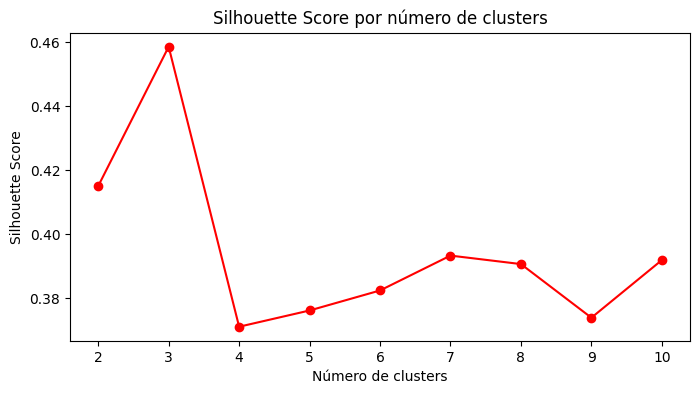

In [4]:

inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nr. Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()


sil_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,4))
plt.plot(K, sil_scores, 'ro-')
plt.xlabel('Nr. clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score p/Cluster')
plt.show()

Shape do dataframe (linhas dia×zona): (212274, 19)


,date,consumo_gwh,zone,tmean_c,tmax_c,tmin_c,hdd18,cdd22,amp_termica,precip_mm,rad_solar,sunshine_sec,humidade_relativa,nebulosidade_media,wind_speed_max,wind_gusts_max,day_length_hours,sunshine_h,day_length_h
0,2015-01-01,119.0,ALCOBAÇA,9.1,14.7,4.9,8.9,0.0,9.8,0.0,9.68,30286.11,79,0,11.9,19.8,9.43,8.412808,9.43
1,2015-01-01,119.0,ALMADA,9.5,14.0,6.3,8.5,0.0,7.7,0.0,10.00,30642.81,76,0,12.3,21.2,9.52,8.511892,9.52
2,2015-01-01,119.0,AMADORA,9.5,13.8,6.6,8.5,0.0,7.2,0.0,10.00,30613.52,74,0,12.3,21.2,9.50,8.503756,9.50


agg_zone shape (zonas): (54, 8)


,zone,consumo_mean,consumo_std,tmean_mean,tmean_std,HDD_sum,CDD_sum,days
0,ALCOBAÇA,137.2784,14.688587,15.935716,3.515181,10452.5,161.5,3931
1,ALMADA,137.2784,14.688587,17.017069,4.460760,9512.8,1104.0,3931
2,AMADORA,137.2784,14.688587,16.554032,4.535477,10674.0,1006.4,3931
3,AVEIRO,137.2784,14.688587,15.551183,4.188406,12409.2,397.1,3931
4,BARCELOS,137.2784,14.688587,15.638133,5.176685,13883.8,1150.0,3931


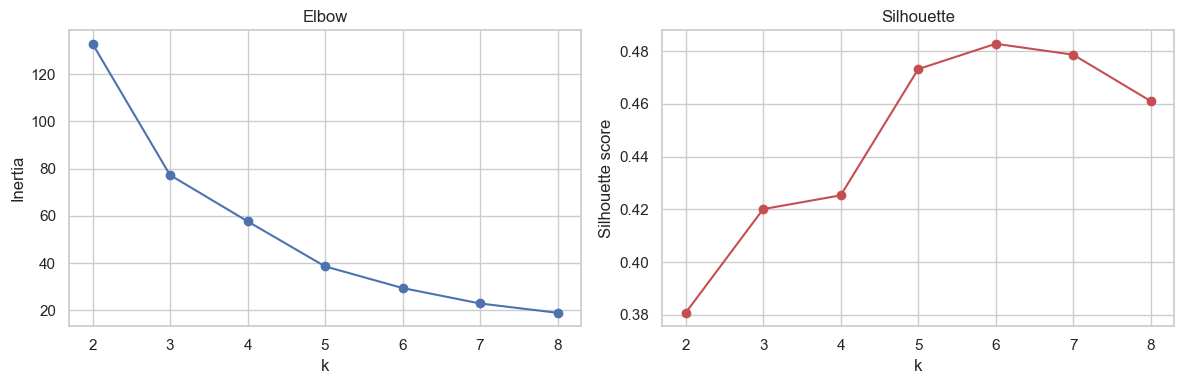

Cluster summary (médias por cluster):


,consumo_mean,consumo_std,tmean_mean,tmean_std,HDD_sum,CDD_sum
cluster,,,,,,
0,137.278,14.689,15.727,4.392,12435.011,632.886
1,137.278,14.689,17.376,4.956,9611.087,1947.500
2,137.278,14.689,14.575,6.079,18277.827,1470.700


Saved -> zones_with_cluster.csv and cluster_summary.csv


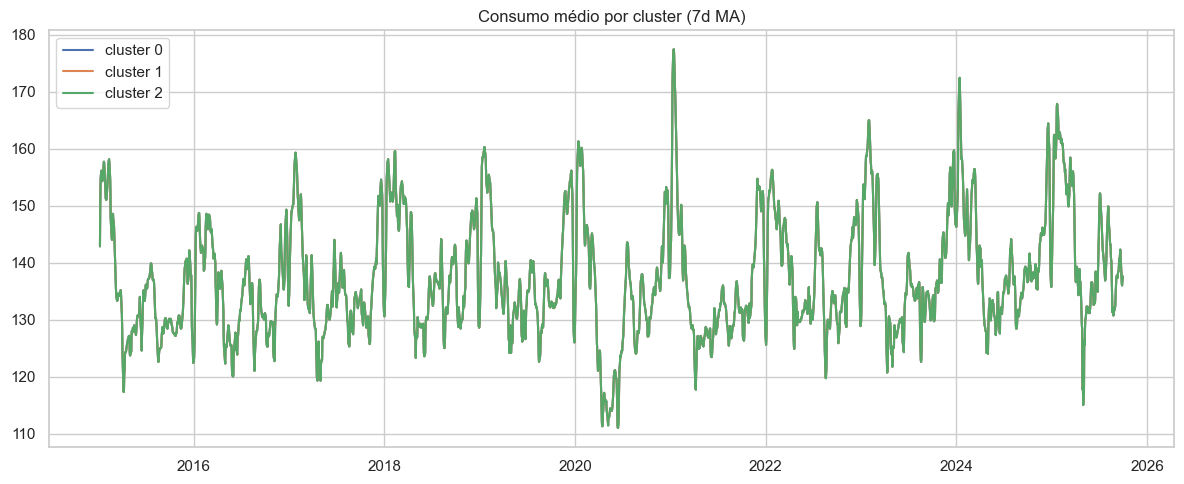

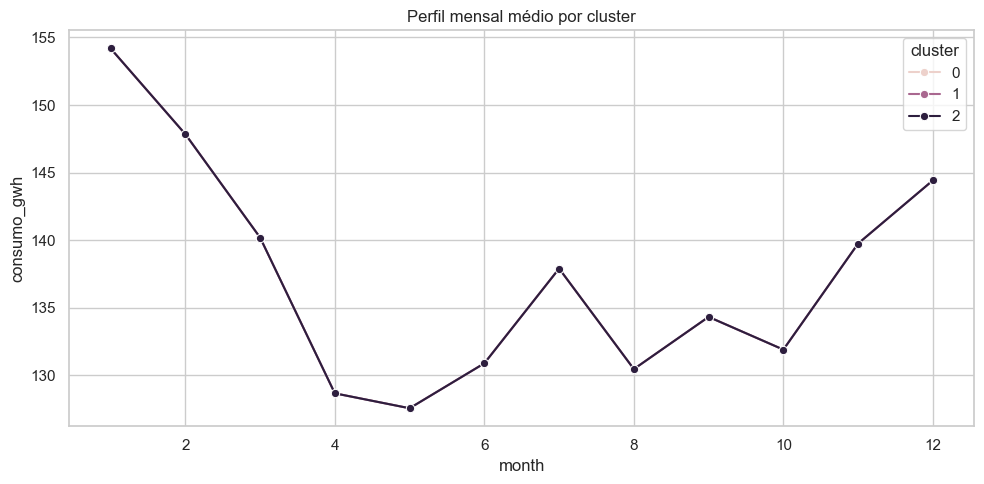

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")

# Caminho para o CSV
FPATH = r"C:\Users\pcata\OneDrive\Ambiente de Trabalho\final_zonal_diario.csv"

# 1) Load csv
df = pd.read_csv(FPATH, parse_dates=['date'], sep=';', dayfirst=True, low_memory=False)
print("Shape do dataframe (linhas dia×zona):", df.shape)
display(df.head(3))

# 2) Agg. by Zone
agg_zone = df.groupby('zone').agg(
    consumo_mean = ('consumo_gwh','mean'),
    consumo_std  = ('consumo_gwh','std'),
    tmean_mean   = ('tmean_c','mean'),
    tmean_std    = ('tmean_c','std'),
    HDD_sum      = ('hdd18','sum'),
    CDD_sum      = ('cdd22','sum'),
    days         = ('date','count')
).reset_index()

print("agg_zone shape (zonas):", agg_zone.shape)
display(agg_zone.head(5))

# 3) Features for clustering
features = ['consumo_mean','consumo_std','tmean_mean','tmean_std','HDD_sum','CDD_sum']
X = agg_zone[features].fillna(0).values  # fillna por segurança

# 4) Normalize
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# 5) Elbow + Silhouette (fast: nr. of zones ~ 50)
Ks = range(2,9)
inertia = []
sil = []
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = km.fit_predict(Xs)
    inertia.append(km.inertia_)
    sil.append(silhouette_score(Xs, labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(Ks), inertia, 'bo-'); plt.title('Elbow'); plt.xlabel('k'); plt.ylabel('Inertia')
plt.subplot(1,2,2)
plt.plot(list(Ks), sil, 'ro-'); plt.title('Silhouette'); plt.xlabel('k'); plt.ylabel('Silhouette score')
plt.tight_layout()
plt.show()

# 6) Running k-means for choosen kk_choice = 3
km = KMeans(n_clusters=k_choice, random_state=42, n_init=50, max_iter=300)
agg_zone['cluster'] = km.fit_predict(Xs)

# 7) Resume p/cluster 
cluster_summary = agg_zone.groupby('cluster')[features].mean().round(3)
print("Cluster summary (médias por cluster):")
display(cluster_summary)

# 8) Save outputs
agg_zone.to_csv("zones_with_cluster.csv", index=False)
cluster_summary.to_csv("cluster_summary.csv")
print("Saved -> zones_with_cluster.csv and cluster_summary.csv")

# 9) Map cluster back to daily dataset (optional) and plot average series per cluster
df = df.merge(agg_zone[['zone','cluster']], on='zone', how='left')
cluster_daily = df.groupby(['date','cluster'])['consumo_gwh'].mean().reset_index()

plt.figure(figsize=(12,5))
for c in sorted(cluster_daily['cluster'].unique()):
    s = cluster_daily[cluster_daily['cluster']==c].set_index('date')['consumo_gwh'].rolling(7).mean()
    plt.plot(s.index, s.values, label=f'cluster {c}')
plt.legend(); plt.title('Average consumption per cluster (7-day MA)')
plt.tight_layout()
plt.savefig("consumo_cluster_series.png", dpi=150)
plt.show()

# 10) Average seasonal profile by cluster (month)
cluster_month = cluster_daily.copy()
cluster_month['month'] = cluster_month['date'].dt.month
monthly_profile = cluster_month.groupby(['cluster','month'])['consumo_gwh'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_profile, x='month', y='consumo_gwh', hue='cluster', marker='o')
plt.title("Perfil mensal médio por cluster")
plt.tight_layout()
plt.savefig("cluster_monthly_profiles.png", dpi=150)
plt.show()